# Machine Translation

English-German Translation

# 1)- Importing key modules

In [0]:
#support both Python 2 and Python 3 with minimal overhead.
from __future__ import absolute_import, division, print_function
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
# What's life without style :). So, let's add style to our dataframes
#from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
#HTML('<style>{}</style>'.format(css))

In [0]:
import pandas as pd 
import string 
import pickle
from pickle import dump
from pickle import load
from string import digits
import re 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from numpy import array, argmax, random, take 
import matplotlib.pyplot as plt 
%matplotlib inline 
pd.set_option('display.max_colwidth', 200)

In [4]:
from keras.models import Model
from keras.models import Sequential 
from keras.layers import Dense, LSTM, Embedding,Input,RepeatVector
from keras.preprocessing.text import Tokenizer
from keras.callbacks import ModelCheckpoint 
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model 
from keras import optimizers 

Using TensorFlow backend.


In [5]:
!  pip install version_information

In [6]:
# first install: pip install version_information
%reload_ext version_information
%version_information pandas,re,sklearn, matplotlib,keras

Software versions
Python 3.6.8 64bit [GCC 8.0.1 20180414 (experimental) [trunk revision 259383]
IPython 5.5.0
OS Linux 4.14.137+ x86_64 with Ubuntu 18.04 bionic
pandas 0.24.2
re 2.2.1
sklearn 0.21.3
matplotlib 3.0.3
keras 2.2.5
Wed Sep 11 12:40:17 2019 UTC

# 2)- Reading Dataset

In [0]:
lines= pd.read_pickle('data_2015_pandas.pkl')

In [8]:
lines.shape

(2169, 2)

In [9]:
lines.head()

,eng,ger
0,India and Japan prime ministers meet in Tokyo,Die Premierminister Indiens und Japans trafen sich in Tokio.
1,"India's new prime minister, Narendra Modi, is meeting his Japanese counterpart, Shinzo Abe, in Tokyo to discuss economic and security ties, on his first major foreign visit since winning May's ele...","Indiens neuer Premierminister Narendra Modi trifft bei seinem ersten wichtigen Auslandsbesuch seit seinem Wahlsieg im Mai seinen japanischen Amtskollegen Shinzo Abe in Toko, um wirtschaftliche und..."
2,Mr Modi is on a five-day trip to Japan to strengthen economic ties with the third largest economy in the world.,"Herr Modi befindet sich auf einer fünftägigen Reise nach Japan, um die wirtschaftlichen Beziehungen mit der drittgrößten Wirtschaftsnation der Welt zu festigen."
3,High on the agenda are plans for greater nuclear co-operation.,Pläne für eine stärkere kerntechnische Zusammenarbeit stehen ganz oben auf der Tagesordnung.
4,India is also reportedly hoping for a deal on defence collaboration between the two nations.,Berichten zufolge hofft Indien darüber hinaus auf einen Vertrag zur Verteidigungszusammenarbeit zwischen den beiden Nationen.


As this is big data and I have a poor old computing machine. So, I ll use smaller sample. It got to be random to avoid sample biaseness

In [10]:
lines.sample(15)

,eng,ger
343,And it's tedious.,Und es ist anstrengend.
114,We are expecting there to be a significant amount of cancellations.,Wir rechnen mit erheblichen Ausfällen.
662,"Your ankles, maybe, a bit...","Vielleicht deine Knöchel, ein klein bisschen ..."
1839,"Neebo Inc, which operates more than 250 campus bookstores, says textbook rentals have doubled since 2011.","Neebo Inc, das mehr als 250 Universitätsbuchläden betreibt, teilte mit, dass das Mieten von Textbüchern sich seit 2011 verdoppelt habe."
124,Two other local police officers were arrested by Spanish Civil Guards in connection to the corruption claims and will have to be questioned by a judge alongside Navarro.,Zwei weitere Ortspolizisten wurden von der spanischen Guardia Civil in Verbindung mit den Korruptionsvorwürfen festgenommen und werden gemeinsam mit Navarro von einem Richter befragt.
423,The government suspects that thousands of people continue to receive salaries after leaving the civil service.,"Die Regierung vermutet, dass Tausende Personen auch nach ihrem Abschied aus dem öffentlichen Dienst noch Gehaltszahlungen erhalten."
1771,"I think it is really good that some people are not just standing around talking rubbish, but are actually making a real effort to get something up and running.","Ich finde es sehr gut, dass manche nicht nur dumm quatschen, sondern auch wirklich versuchen etwas auf die Beine zu stellen."
1132,Schools too.,Auch Schulen.
1540,The rebels also claimed that for the first time they have sunk two of the Ukrainian coastguard's boats in the Sea of Azov.,"Die Aufständischen behaupteten zudem, erstmals im Asowschen Meer zwei Boote der ukrainischen Küstenwache versenkt zu haben."
1026,"In almost every case, the cause is exposure to asbestos - a fibrous building material once dubbed ""miraculous,"" but now known to be mortally dangerous.","In fast allen Fällen ist der Auslöser eine Asbestbelastung - Kontakt mit dem Faserbaustoff, der einmal als ""Wunderstoff"" galt aber inzwischen als tödlich erkannt wurde."


# 3)- Quick Preprocessing

In [0]:
# Lowercase all characters
lines.eng=lines.eng.apply(lambda x: x.lower())
lines.ger=lines.ger.apply(lambda x: x.lower())

In [0]:
# Remove quotes
lines.eng=lines.eng.apply(lambda x: re.sub("'", '', x))
lines.ger=lines.ger.apply(lambda x: re.sub("'", '', x))

In [0]:
exclude = set(string.punctuation) # Set of all special characters
# Remove all the special characters
lines.eng=lines.eng.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
lines.ger=lines.ger.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [0]:
# Remove all numbers from text
remove_digits = str.maketrans('', '', digits)
lines.eng=lines.eng.apply(lambda x: x.translate(remove_digits))
lines.ger=lines.ger.apply(lambda x: x.translate(remove_digits))

In [0]:
# Remove extra spaces
lines.eng=lines.eng.apply(lambda x: x.strip())
lines.ger=lines.ger.apply(lambda x: x.strip())
lines.eng=lines.eng.apply(lambda x: re.sub(" +", " ", x))
lines.ger=lines.ger.apply(lambda x: re.sub(" +", " ", x))

**Do threshold here**

In [0]:
# Add start and end tokens to target sequences. I am not German so , I am doing so for my ease
lines.ger = lines.ger.apply(lambda x : 'START_ '+ x + ' _END')

In [17]:
lines.ger[:5]

0                                                                                                                                    START_ die premierminister indiens und japans trafen sich in tokio _END
1    START_ indiens neuer premierminister narendra modi trifft bei seinem ersten wichtigen auslandsbesuch seit seinem wahlsieg im mai seinen japanischen amtskollegen shinzo abe in toko um wirtschaftlic...
2                                 START_ herr modi befindet sich auf einer fünftägigen reise nach japan um die wirtschaftlichen beziehungen mit der drittgrößten wirtschaftsnation der welt zu festigen _END
3                                                                                                    START_ pläne für eine stärkere kerntechnische zusammenarbeit stehen ganz oben auf der tagesordnung _END
4                                                                   START_ berichten zufolge hofft indien darüber hinaus auf einen vertrag zur verteidigungszusammenarbeit zwischen 

In [18]:
lines.sample(10)

,eng,ger
723,talk is better than silence the sung word is better than the written but nothing is better than love,START_ sprechen ist besser als schweigen das gesungene wort ist besser als das geschriebene aber nichts ist besser als liebe _END
1111,the link in that case was clear,START_ die verbindung in dem fall war klar _END
452,since upper franconia had no free teaching place for him he applied to upper bavaria and received a post on november at a school in kollbach,START_ da oberfranken für ihn keine freie lehrerstelle hatte bewarb er sich nach oberbayern und kam am november an die schule in kollbach _END
717,but certain kinds of hypersensitivity while entirely acceptable and laudable in themselves may sometimes distort findings such as you have presented to me,START_ aber bestimmte arten von hypersensibilität die an sich absolut akzeptabel und lobenswert sind können gelegentlich ergebnisse wie sie sie vorgestellt haben verzerren _END
2025,in mogherini became vice president for three years of the european community organization of socialist youth,START_ wurde mogherini für drei jahre vizepräsidentin der european community organisation of socialist youth europäische jungsozialisten _END
872,the boy whose shocking image after the siege came to define the horror of beslan,START_ der junge dessen schreckliches bild nach der belagerung zum symbol der greuel von beslan wurde _END
2097,putin said that anyone who believed peace talks are in the offing as ukrainian politicians launch campaigns for an oct parliamentary election and while government troops are attacking civilian com...,START_ putin wies darauf hin dass all diejenigen die im zuge der kampagnen ukrainischer politiker für die wahlen am okt und während regierungsgruppen zivile gemeinden in den von separatisten gehal...
1043,even the hospitals that are meant to make us better have been reservoirs of this deadly carcinogen,START_ auch in den krankenhäusern in denen wir doch gesund werden sollen sind schon als ausgangsherde dieses tödlichen karzinogens ausgemacht worden _END
616,this his father had always done to stifle the letter j before it left his lips,START_ das hatte sein vater immer getan um den buchstaben j zu stoppen bevor er aus seinem mund kam _END
1088,the goddard report noted that the presence of asbestos has not been managed in accordance with the various regulations,START_ der goddardbericht wies auch darauf hin dass das vorhandensein von asbest nicht entsprechend den jeweiligen bestimmungen gehandhabt wurde _END


### 3a)- Vocab Size

In [0]:
# Vocabulary of English
all_eng_words=set()
for eng in lines.eng:
    for word in eng.split():
        if word not in all_eng_words:
            all_eng_words.add(word)
# Vocabulary of German 
all_german_words=set()
for ger in lines.ger:
    for word in ger.split():
        if word not in all_german_words:
            all_german_words.add(word)

In [20]:
# Max Length of source sequence
import numpy as np
lenght_list=[]
for l in lines.eng:
    lenght_list.append(len(l.split(' ')))
max_length_src = np.max(lenght_list)
max_length_src

71

In [21]:
# Max Length of target sequence
lenght_list=[]
for l in lines.ger:
    lenght_list.append(len(l.split(' ')))
max_length_tar = np.max(lenght_list)
max_length_tar

74

In [22]:
lines['word_eng'] = lines['eng'].apply(lambda x: len(str(x).split(" ")))
lines[['eng','word_eng']].head()

,eng,word_eng
0,india and japan prime ministers meet in tokyo,8
1,indias new prime minister narendra modi is meeting his japanese counterpart shinzo abe in tokyo to discuss economic and security ties on his first major foreign visit since winning mays election,31
2,mr modi is on a fiveday trip to japan to strengthen economic ties with the third largest economy in the world,21
3,high on the agenda are plans for greater nuclear cooperation,10
4,india is also reportedly hoping for a deal on defence collaboration between the two nations,15


In [23]:
# adding +2 due to adding of START and END
lines['word_ger'] = lines['ger'].apply(lambda x: len(str(x).split(" ")))
lines[['ger','word_ger']].head()

,ger,word_ger
0,START_ die premierminister indiens und japans trafen sich in tokio _END,11
1,START_ indiens neuer premierminister narendra modi trifft bei seinem ersten wichtigen auslandsbesuch seit seinem wahlsieg im mai seinen japanischen amtskollegen shinzo abe in toko um wirtschaftlic...,32
2,START_ herr modi befindet sich auf einer fünftägigen reise nach japan um die wirtschaftlichen beziehungen mit der drittgrößten wirtschaftsnation der welt zu festigen _END,24
3,START_ pläne für eine stärkere kerntechnische zusammenarbeit stehen ganz oben auf der tagesordnung _END,14
4,START_ berichten zufolge hofft indien darüber hinaus auf einen vertrag zur verteidigungszusammenarbeit zwischen den beiden nationen _END,17


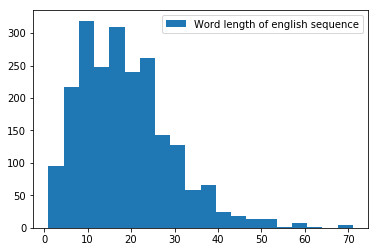

In [24]:
words_eng=lines['word_eng']
plt.hist(words_eng, bins=20, label="Word length of english sequence") 
plt.legend() 
plt.show()

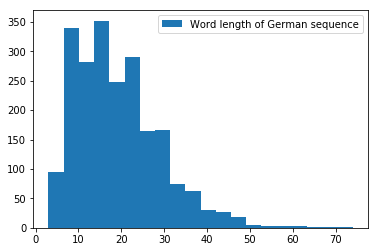

In [25]:
words_ger=lines['word_ger']
plt.hist(words_ger, bins=20, label="Word length of German sequence") 
plt.legend() 
plt.show()

### 3b)-Words' frequency

In [26]:
# let’s check the 10 most frequently occurring words in our English text data
freq_eng = pd.Series(' '.join(lines['eng']).split()).value_counts()[:10]
freq_eng

the     2643
to      1115
of      1078
in      1015
and      953
a        903
for      423
that     410
is       400
was      382
dtype: int64

In [27]:
freq_ger = pd.Series(' '.join(lines['ger']).split()).value_counts()[:12]
freq_ger

_END      2169
START_    2169
die       1256
der       1177
und        940
in         790
den        453
von        433
das        426
zu         406
für        333
dass       332
dtype: int64

As we have start and end so, I did check 12 so that we get idea of most fequent words

**How about least occuring words**

In [28]:
less_freq_eng = pd.Series(' '.join(lines['eng']).split()).value_counts()[-10:]
less_freq_eng

helping      1
macmillan    1
certainty    1
minstrel     1
differ       1
bedroom      1
kevin        1
stormed      1
yatsenyuk    1
throw        1
dtype: int64

In [29]:
less_freq_ger = pd.Series(' '.join(lines['ger']).split()).value_counts()[-10:]
less_freq_ger

allianz          1
zugerechnet      1
cooke            1
metallisch       1
pointandshoot    1
hauptquartier    1
entnehmen        1
buchungen        1
geheimnis        1
frittentoni      1
dtype: int64

### 3a)- Defining input and target

In [30]:
input_words = sorted(list(all_eng_words))
target_words = sorted(list(all_german_words))
num_encoder_tokens = len(all_eng_words)
num_decoder_tokens = len(all_german_words)
num_encoder_tokens, num_decoder_tokens

(7254, 9359)

In [31]:
num_decoder_tokens += 1 # For zero padding
num_decoder_tokens

9360

In [0]:
input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])

In [0]:
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())

In [34]:
print(reverse_input_char_index)

{1: 'a', 2: 'abandon', 3: 'abandoned', 4: 'abbott', 5: 'abbotts', 6: 'abc', 7: 'abdulmalik', 8: 'abe', 9: 'abilities', 10: 'ability', 11: 'able', 12: 'abortion', 13: 'abortions', 14: 'about', 15: 'above', 16: 'absence', 17: 'absentmindedly', 18: 'absolutely', 19: 'abstract', 20: 'abuse', 21: 'academics', 22: 'academy', 23: 'accelerated', 24: 'accept', 25: 'acceptable', 26: 'accepted', 27: 'access', 28: 'accident', 29: 'accidents', 30: 'acclaim', 31: 'acclaimed', 32: 'accommodate', 33: 'accommodated', 34: 'accommodation', 35: 'accompanying', 36: 'accordance', 37: 'according', 38: 'accordingly', 39: 'account', 40: 'accounts', 41: 'accusations', 42: 'accused', 43: 'accuses', 44: 'accusing', 45: 'achenbach', 46: 'aches', 47: 'achieve', 48: 'achieved', 49: 'achievement', 50: 'achievements', 51: 'achieving', 52: 'achilles', 53: 'acknowledge', 54: 'acknowledges', 55: 'acquire', 56: 'acquired', 57: 'acquiring', 58: 'acquitted', 59: 'acrobatics', 60: 'across', 61: 'act', 62: 'acting', 63: 'acti

In [35]:
print(reverse_target_char_index)

{1: 'START_', 2: '_END', 3: 'a', 4: 'ab', 5: 'abbildung', 6: 'abbog', 7: 'abbott', 8: 'abbotts', 9: 'abbruch', 10: 'abc', 11: 'abdulmalik', 12: 'abe', 13: 'abend', 14: 'abends', 15: 'aber', 16: 'aberkannt', 17: 'abfahrt', 18: 'abfindung', 19: 'abgaben', 20: 'abgebildete', 21: 'abgehalten', 22: 'abgehoben', 23: 'abgelegenen', 24: 'abgelegener', 25: 'abgenommen', 26: 'abgeordneten', 27: 'abgeordnetenkammer', 28: 'abgeordneter', 29: 'abgeschlossen', 30: 'abgeschossen', 31: 'abgeschreckt', 32: 'abgesetzt', 33: 'abgesprungene', 34: 'abgestellt', 35: 'abgestiegen', 36: 'abgetrennt', 37: 'abgewandt', 38: 'abhilfe', 39: 'abhängigen', 40: 'abkommen', 41: 'abkühlt', 42: 'ablauf', 43: 'ablehnt', 44: 'ablehnte', 45: 'about', 46: 'abreißen', 47: 'abriss', 48: 'abschaffung', 49: 'abscheu', 50: 'abscheuliche', 51: 'abschied', 52: 'abschluss', 53: 'abschlussstudent', 54: 'abschlüsse', 55: 'abschwungs', 56: 'absichtlich', 57: 'absolut', 58: 'absolute', 59: 'absoluten', 60: 'absoluter', 61: 'absolvieren

### 3b)-Train - Test Split

For validation

In [36]:
X, y = lines.eng, lines.ger #X being input, y being target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train.shape, X_test.shape

((1735,), (434,))

**Save the train and test dataframes for reproducing the results later, as they are shuffled**

In [0]:
X_train.to_pickle('X_train.pkl')
X_test.to_pickle('X_test.pkl')

In [0]:
def generate_batch(X = X_train, y = y_train, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                    if t>0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        # Offset by one timestep
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

# 4)-Encoder - Decoder Model Architecture

In [0]:
latent_dim = 50

In [40]:
# Encoder
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(num_encoder_tokens, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)
# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_decoder_tokens, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [42]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])

In [0]:
#from IPython.display import Image
#Image(retina=True, filename='train.png')

In [0]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 15

In [45]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, None)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, None, 50)     362700      input_1[0][0]                    
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 50)     468000      input_2[0][0]                    
____________________________________________________________________________________________

In [46]:
history=model.fit_generator(generator = generate_batch(X_train, y_train, batch_size = batch_size),
                    steps_per_epoch = train_samples//batch_size,
                    epochs=epochs,
                    validation_data = generate_batch(X_test, y_test, batch_size = batch_size),
                    validation_steps = val_samples//batch_size)


Epoch 1/15
13/13 [==============================] - 12s 943ms/step - loss: 8.9284 - acc: 0.0425 - val_loss: 8.3966 - val_acc: 0.0550
Epoch 2/15
13/13 [==============================] - 9s 665ms/step - loss: 7.9683 - acc: 0.0548 - val_loss: 7.7456 - val_acc: 0.0565
Epoch 3/15
13/13 [==============================] - 9s 664ms/step - loss: 7.4199 - acc: 0.0550 - val_loss: 7.5126 - val_acc: 0.0560
Epoch 4/15
13/13 [==============================] - 9s 670ms/step - loss: 7.2119 - acc: 0.0548 - val_loss: 7.4693 - val_acc: 0.0552
Epoch 5/15
13/13 [==============================] - 9s 664ms/step - loss: 7.1294 - acc: 0.0547 - val_loss: 7.4554 - val_acc: 0.0550
Epoch 6/15
13/13 [==============================] - 9s 664ms/step - loss: 7.0879 - acc: 0.0547 - val_loss: 7.4922 - val_acc: 0.0565
Epoch 7/15
13/13 [==============================] - 9s 666ms/step - loss: 7.0844 - acc: 0.0549 - val_loss: 7.5563 - val_acc: 0.0560
Epoch 8/15
13/13 [==============================] - 9s 669ms/step - loss: 

As we can see this accuracy is too low and loss(reflects error) is high. I wonder if we could predict any good results out of it?

In [0]:
# save model
model.save_weights('translate_attempt1.h5')

In [0]:
# for later use even in other notebooks
model.load_weights('translate_attempt1.h5')

# 5)- Inference Setup

In [0]:
# Encode the input sequence to get the "thought vectors"
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2= dec_emb_layer(decoder_inputs) # Get the embeddings of the decoder sequence

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2) # A dense softmax layer to generate prob dist. over the target vocabulary

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

# Decode sample sequeces

In [0]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    
    
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = target_token_index['START_']
  

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '_END' or
           len(decoded_sentence) > 50):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

# 6)- Model Validation

### 6a.Evaluation on Train Dataset

In [0]:
train_gen = generate_batch(X_train, y_train, batch_size = 1)
k=-1

In [54]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual German Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: strict environmental standards for the future shall apply to all cars and vacuum cleaners that go on sale as of today
Actual German Translation:  für autos und staubsauger die ab heute in den handel kommen gelten künftig strengere umweltstandards 
Predicted German Translation:  


### 6b. Evaluation on Validation Dataset

In [0]:
val_gen = generate_batch(X_test, y_test, batch_size = 1)
k=-1

In [56]:
k+=1
(input_seq, actual_output), _ = next(val_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_test[k:k+1].values[0])
print('Actual German Translation:', y_test[k:k+1].values[0][6:-4])
print('Predicted German Translation:', decoded_sentence[:-4])

Input English sentence: the plan for friday th september is an evening of entertainment provided by the group dorfrocker
Actual German Translation:  geplant ist am freitag september ein großer unterhaltungsabend mit der gruppe dorfrocker 
Predicted German Translation:  


**As expected, we got no good results. We better go back to data preprocessing part and re-build our model**

### 6c. Plotting Loss and Accuracy

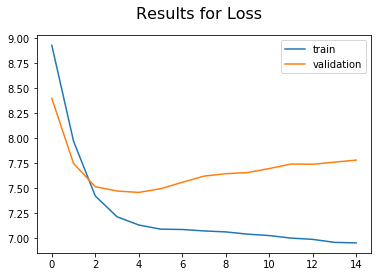

In [57]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.legend(['train','validation']) 
plt.suptitle('Results for Loss', fontsize=16)
plt.show()

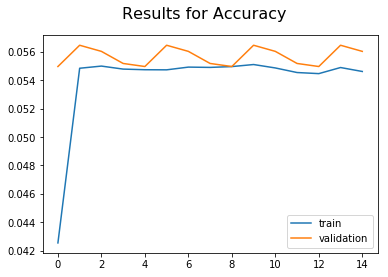

In [58]:
plt.plot(history.history['acc']) 
plt.plot(history.history['val_acc']) 
plt.legend(['train','validation']) 
plt.suptitle('Results for Accuracy', fontsize=16)
plt.show()

We can see that train and validation accuracies are low. Also validation accuracy shows a lot of fluctuation i.e it is not showing any pattern of improvement after certain epoch counts.